# Water potability

Based on the [Kaggle Challenge Drinking_Water_Potability](https://www.kaggle.com/artimule/drinking-water-probability)

**Context**
Access to safe drinking water is essential to health, a basic human right, and a component of effective policy for health protection. This is important as a health and development issue at a national, regional, and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**Content**
The drinking_water_potability.csv file contains water quality metrics for 3276 different water bodies.


## 0. Setup


In [133]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Numpy arrays are used to store training and test data.
import numpy as np

# Pandas is used to manipulate tabular data.
import pandas as pd

# Matplotlib is used to plot graphs.
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998).
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Convenience function to create display a progress bar.
# Source : https://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console
def print_progress_bar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()
 
# Saves a figure to a file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("./figs", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1. EDA


In [134]:
data = pd.read_csv("drinking_water_potability.csv")
data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [135]:
data.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [136]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum() / data.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data


,Total,%
Sulfate,781,23.8
ph,491,15.0
Trihalomethanes,162,4.9
Hardness,0,0.0
Solids,0,0.0
Chloramines,0,0.0
Conductivity,0,0.0
Organic_carbon,0,0.0
Turbidity,0,0.0
Potability,0,0.0


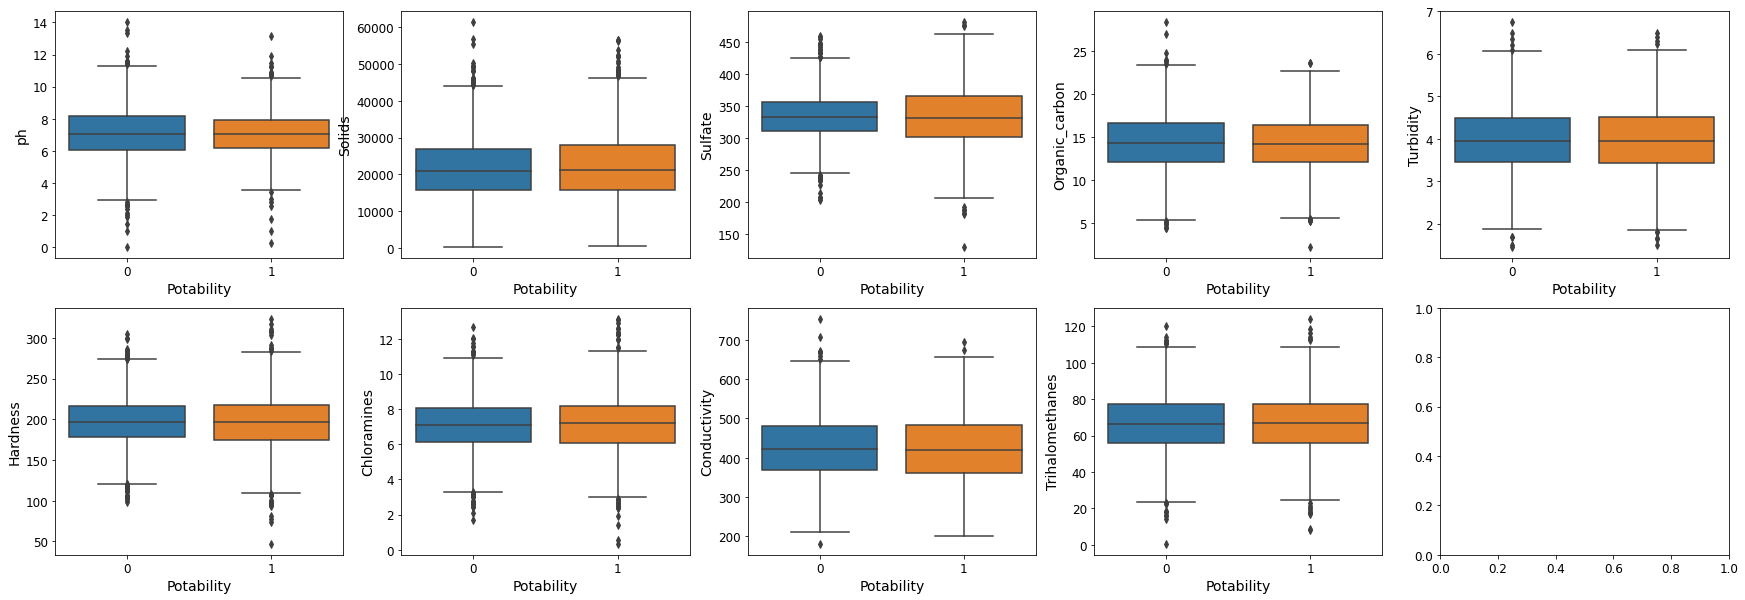

In [156]:
fig, ax = plt.subplots(2,5, figsize=(30, 10))
for i, col in enumerate(data.columns):
    if col == "Potability": continue
    sns.boxplot(data=data, x="Potability", y=col, ax=ax[i%2, i//2])

In [ ]:
data[(data['Potability'])]

0    2011
1    1105
2     151
3       9
dtype: int64

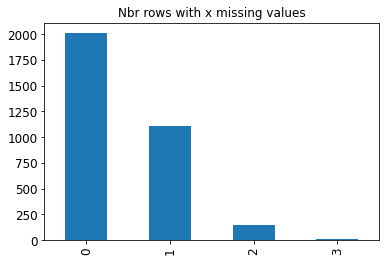

In [66]:
columns_with_missing_values = ["ph", "Sulfate", "Trihalomethanes"]
missing_count = data.isna().sum(axis=1).value_counts()
missing_count.plot.bar(title="Nbr rows with x missing values")
missing_count.head()


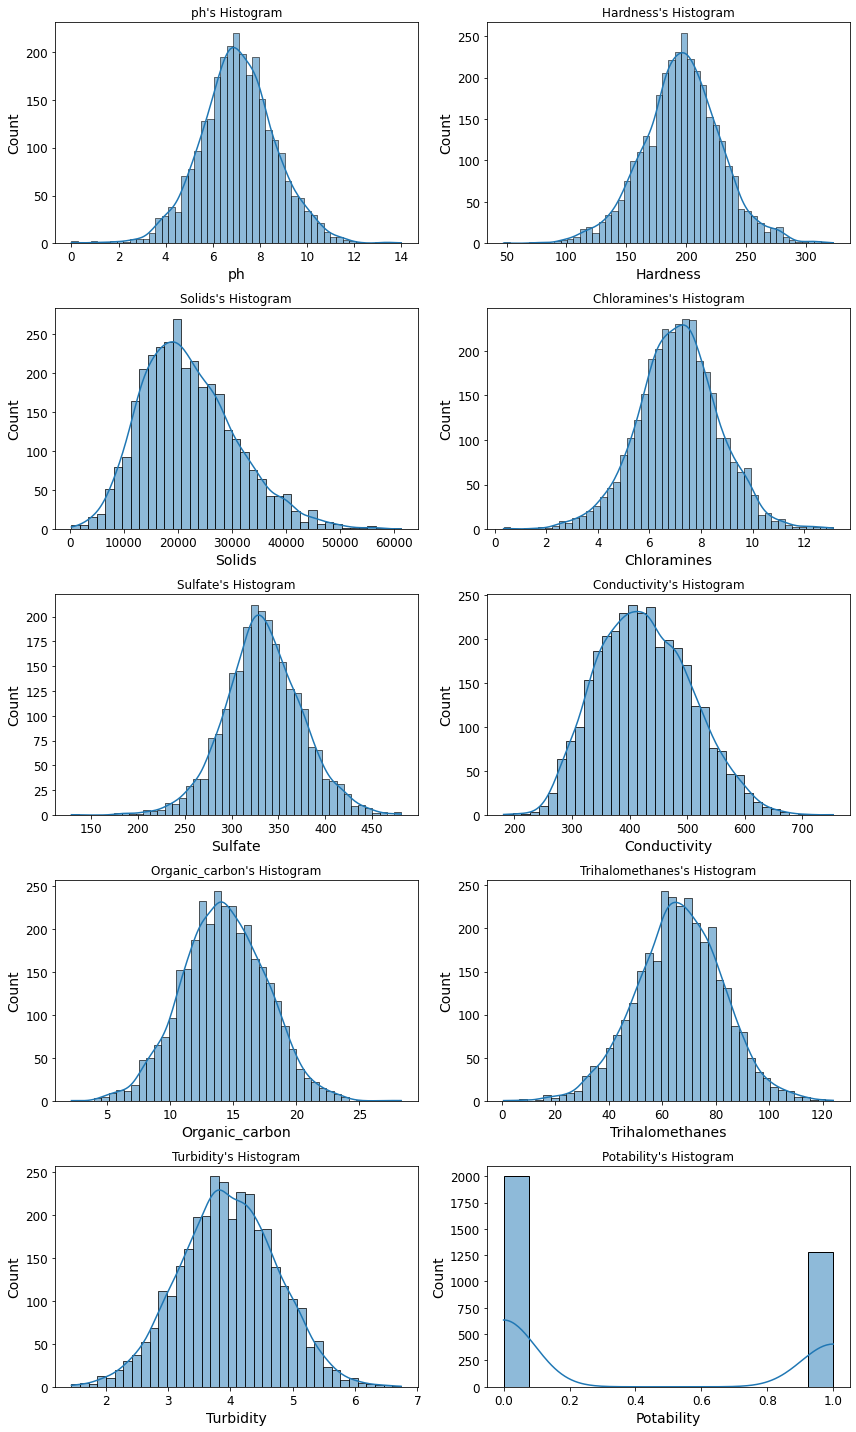

In [67]:
import seaborn as sns

plt.figure(figsize=(12, 20))

for n, column in enumerate(data.columns):
    plt.subplot(5, 2, n + 1)
    sns.histplot(data[column], kde=True)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"{column}'s Histogram")

plt.tight_layout()
plt.show()


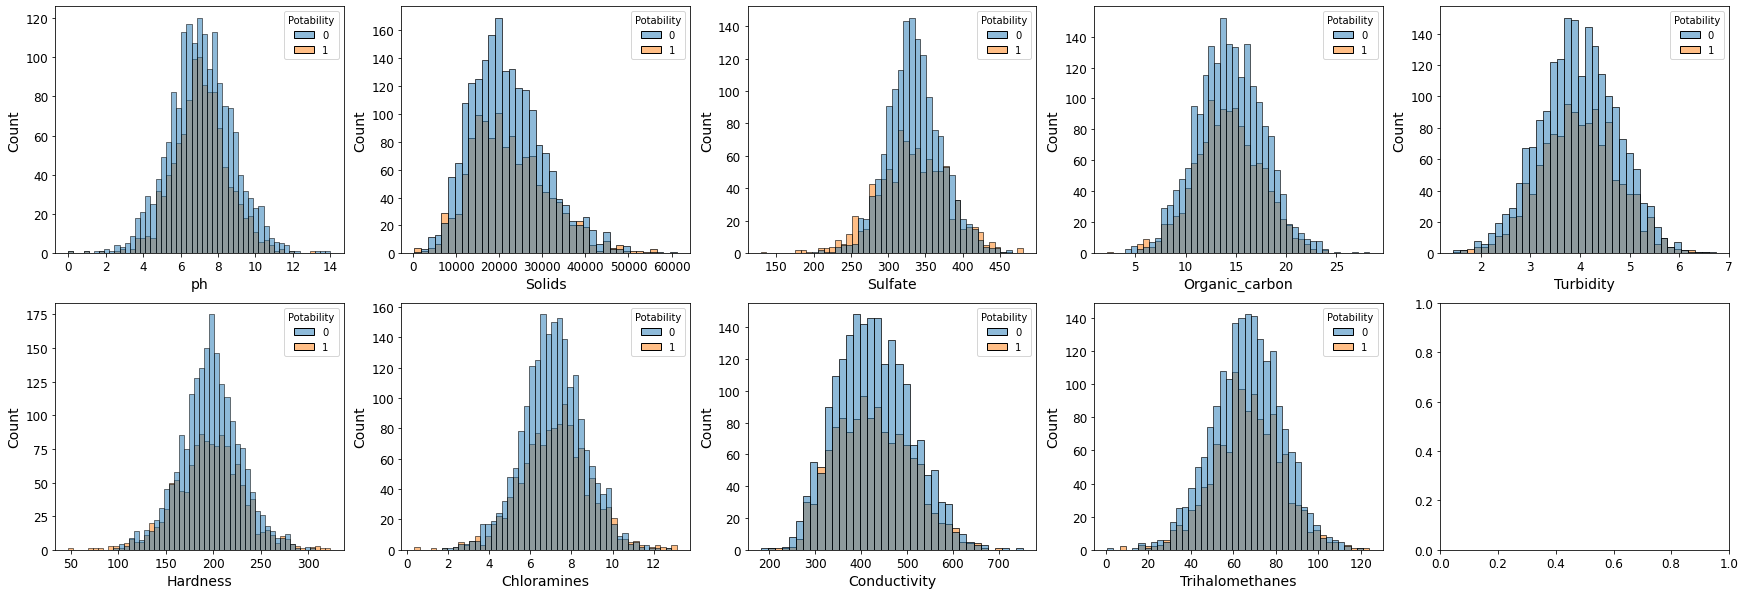

In [68]:
def plot_repartition(data: pd.DataFrame):
    """Plot the repartition of the data."""
    fig, axes = plt.subplots(2, 5, figsize=(30,10))
    for i, col in enumerate(data.columns):
        if col == "Potability": continue
        sns.histplot(data, x=col, hue="Potability", ax=axes[i%2, i//2])
plot_repartition(data)

In [132]:
data[['Potability', "ph"]]

,Potability,ph
0,0,7.186810
1,0,3.716080
2,0,8.099124
3,0,8.316766
4,0,9.092223
...,...,...
3270,1,6.069616
3271,1,4.668102
3273,1,9.419510
3274,1,5.126763


<AxesSubplot:>

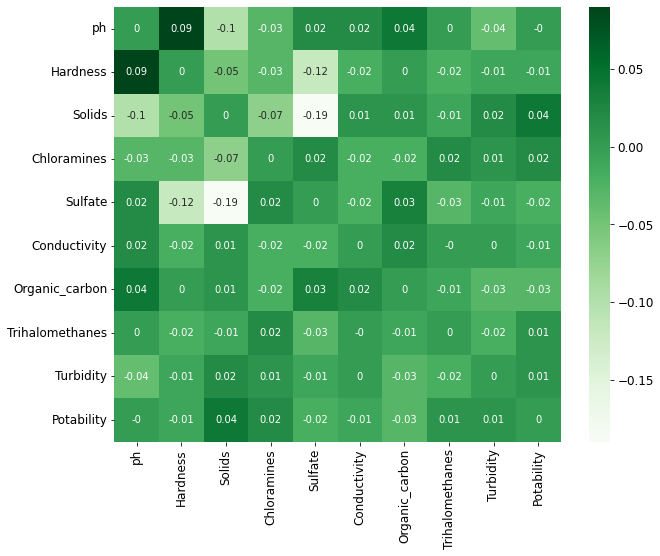

In [114]:
plt.figure(figsize=(10, 8))
# Try to add the powers of 2 just to check if no basic correlations
df = data.copy()
if False:
    for col in df.columns:
        if col == "Potability":
            continue
        df[col + "_squared"] = df[col].apply(lambda x: x ** 2)

sns.heatmap(
    np.round(df.corr() - np.diag([1.0 for _ in df.columns]), 2),
    annot=True,
    cmap="vlag_r",
)


In [70]:
# Check for the importance of each parameter
from sklearn.linear_model import LogisticRegression

data_without_missing = data.dropna()
model = LogisticRegression()
model.fit(
    data_without_missing.drop(columns=["Potability"]),
    data_without_missing["Potability"],
)
params = list(filter(lambda x: x != "Potability", data_without_missing.columns))
params_weighted = list(zip(params, model.coef_.tolist()[0]))
params_weighted_df = pd.DataFrame(params_weighted, columns=["Column", "Coef"])
params_weighted_df["Coef"] = params_weighted_df["Coef"].apply(abs)
params_weighted_df.sort_values(by=["Coef"], ascending=False)


# Don't know if this is really usefull, but maybe sulfate, conductivity and hardness are better


,Column,Coef
4,Sulfate,8.402985e-04
5,Conductivity,4.916730e-04
1,Hardness,4.041244e-04
6,Organic_carbon,6.475868e-05
7,Trihalomethanes,6.260801e-05
2,Solids,8.346356e-06
3,Chloramines,3.283469e-06
8,Turbidity,8.398895e-07
0,ph,8.441034e-08


In [71]:
# Check the importance of some features
# A REVOIR
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = data.dropna().copy()
X, y = df.drop(columns=["Potability"]), df["Potability"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

selected_cols = []
for i in range(len(df.columns) - 1):
    scores = []
    for col in [x for x in X.columns if x not in selected_cols]:
        model = DecisionTreeClassifier(max_depth=(len(selected_cols) + 1) * 2)
        model.fit(X_train[selected_cols + [col]], y_train)
        train_score = model.score(X_train[selected_cols + [col]], y_train)
        test_score = model.score(X_test[selected_cols + [col]], y_test)
        scores.append((col, train_score, test_score))
    scores = list(sorted(scores, key=lambda x: x[2], reverse=True))
    print(f"Selected {scores[0][0]} with score of {scores[0][2]}")
    selected_cols.append(scores[0][0])


Selected Conductivity with score of 0.6241721854304636
Selected Chloramines with score of 0.6258278145695364
Selected ph with score of 0.640728476821192
Selected Hardness with score of 0.652317880794702
Selected Sulfate with score of 0.6655629139072847
Selected Trihalomethanes with score of 0.652317880794702
Selected Turbidity with score of 0.6324503311258278
Selected Organic_carbon with score of 0.6158940397350994
Selected Solids with score of 0.609271523178808


## 2. Feature Engineering


(3276, 10)
(3116, 10)


0    2011
1    1105
dtype: int64

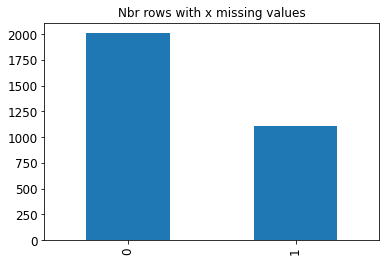

In [72]:
# Drop the lines with 3 missing values and also 2 for now
print(data.shape)
data = data[data.isna().sum(axis=1) < 2].copy()
print(data.shape)

columns_with_missing_values = ["ph", "Sulfate", "Trihalomethanes"]
missing_count = data.isna().sum(axis=1).value_counts()
missing_count.plot.bar(title="Nbr rows with x missing values")
missing_count.head()


In [73]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=666, initial_strategy="most_frequent")
features = list(filter(lambda x: x != "Potability", data.columns))

data[features] = imputer.fit_transform(data[features])
data.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

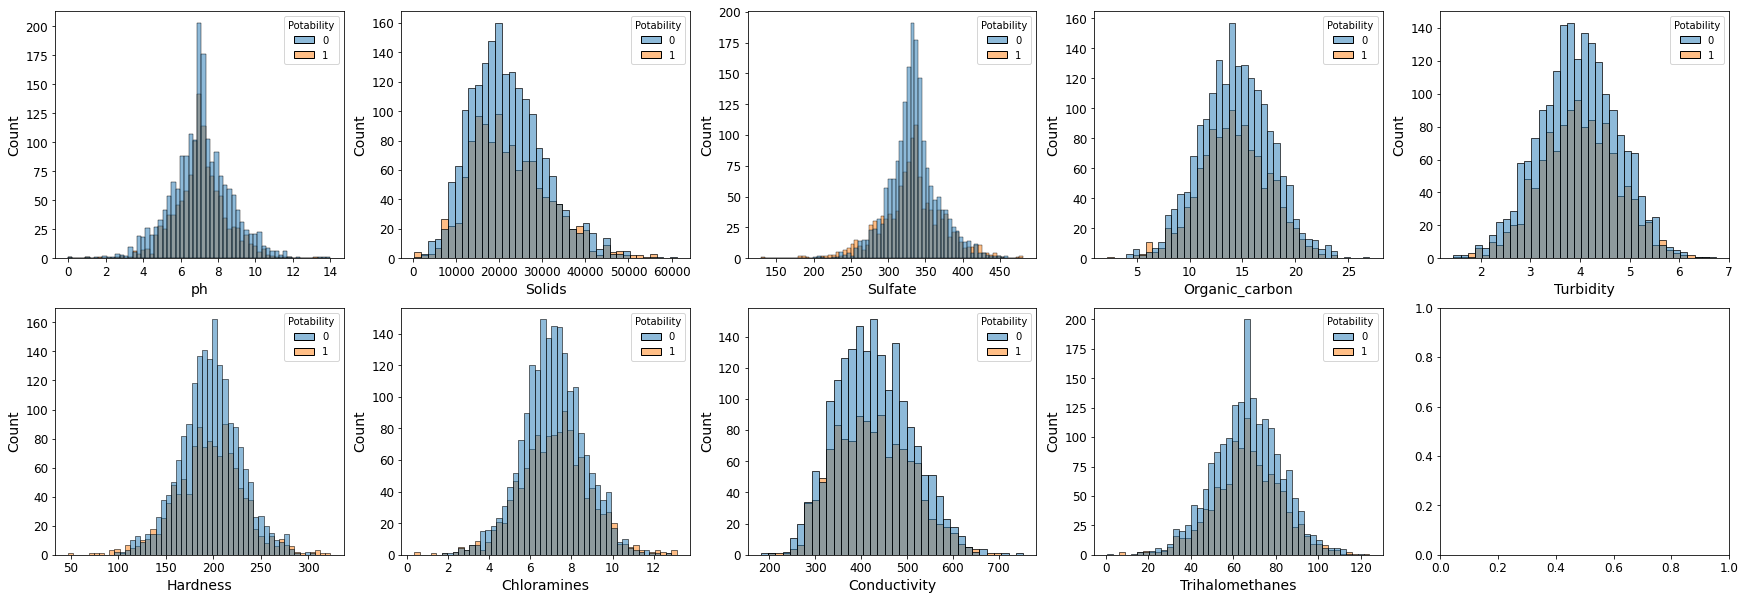

In [74]:
plot_repartition(data)


## 3. Modeling


In [75]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X, y = data[[x for x in data.columns if x != "Potability"]], data["Potability"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=666
)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(2181, 9) (2181,)
(935, 9) (935,)


In [103]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

pipeline = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("Model", RandomForestClassifier(20, class_weight="balanced")),
    ]
)
pipeline


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=20))])

In [104]:
pipeline.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'Scaler', 'Model', 'Scaler__copy', 'Scaler__with_mean', 'Scaler__with_std', 'Model__bootstrap', 'Model__ccp_alpha', 'Model__class_weight', 'Model__criterion', 'Model__max_depth', 'Model__max_features', 'Model__max_leaf_nodes', 'Model__max_samples', 'Model__min_impurity_decrease', 'Model__min_samples_leaf', 'Model__min_samples_split', 'Model__min_weight_fraction_leaf', 'Model__n_estimators', 'Model__n_jobs', 'Model__oob_score', 'Model__random_state', 'Model__verbose', 'Model__warm_start'])

In [115]:
model = GridSearchCV(
    pipeline, {"Model__n_estimators": [10, 20, 50, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]}
)
model.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('Model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_estimators=20))]),
             param_grid={'Model__n_estimators': [10, 20, 50, 60, 80, 100, 120,
                                                 140, 160, 180, 200, 220,
                                                 240]})

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045422,0.003671,0.002702,0.000321,10,{'Model__n_estimators': 10},0.654462,0.651376,0.621560,0.630734,0.612385,0.634103,0.016451,13
1,0.081213,0.001163,0.003616,0.000134,20,{'Model__n_estimators': 20},0.640732,0.655963,0.637615,0.651376,0.644495,0.646036,0.006760,12
2,0.193120,0.003131,0.006496,0.000044,50,{'Model__n_estimators': 50},0.659039,0.660550,0.646789,0.688073,0.637615,0.658413,0.017043,5
3,0.230651,0.001042,0.007516,0.000051,60,{'Model__n_estimators': 60},0.643021,0.653670,0.639908,0.672018,0.662844,0.654292,0.012014,10
4,0.304645,0.006315,0.009515,0.000052,80,{'Model__n_estimators': 80},0.659039,0.651376,0.644495,0.665138,0.667431,0.657496,0.008555,6
5,0.379607,0.003357,0.011476,0.000017,100,{'Model__n_estimators': 100},0.645309,0.672018,0.667431,0.655963,0.633028,0.654750,0.014293,9
6,0.458194,0.006754,0.013520,0.000091,120,{'Model__n_estimators': 120},0.661327,0.665138,0.669725,0.681193,0.639908,0.663458,0.013533,2
7,0.528168,0.004587,0.015546,0.000051,140,{'Model__n_estimators': 140},0.668192,0.667431,0.681193,0.683486,0.642202,0.668501,0.014687,1
8,0.609104,0.006634,0.017589,0.000114,160,{'Model__n_estimators': 160},0.654462,0.660550,0.649083,0.662844,0.637615,0.652911,0.009034,11
9,0.673802,0.008996,0.019538,0.000220,180,{'Model__n_estimators': 180},0.668192,0.674312,0.644495,0.660550,0.653670,0.660244,0.010511,3


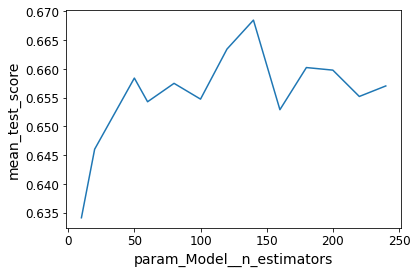

In [116]:
x=pd.DataFrame(model.cv_results_)
sns.lineplot(data=x[["param_Model__n_estimators",
 "mean_test_score"]], x="param_Model__n_estimators", y="mean_test_score")
x


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s finished


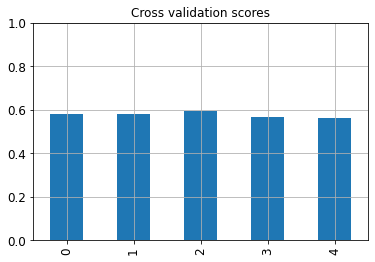

In [129]:
pipeline.set_params(**model.best_params_)
scores = cross_val_score(
    pipeline, X=X_train, y=y_train, cv=5, verbose=True, scoring="f1_macro"
)
fig, ax = plt.subplots(1, 1)
ax.set_ylim((0, 1))
pd.Series(scores).plot.bar(ax=ax, title="Cross validation scores")
plt.grid()


## 4. Evaluation


In [130]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
    precision_score
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"F1 score: {f1_score(y_test, y_pred):5.2f}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred):5.2f}")
print(f"Precision score: {precision_score(y_test, y_pred):5.2f}")

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       573
           1       0.66      0.35      0.46       362

    accuracy                           0.68       935
   macro avg       0.67      0.62      0.62       935
weighted avg       0.68      0.68      0.65       935

F1 score:  0.46
Accuracy score:  0.68
Precision score:  0.66


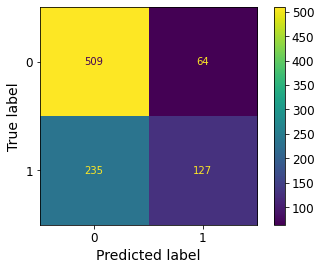

In [131]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot();
